# **Задача:**

Есть флоу обработки заявки:

Поступление заявки  → Звонок опреатора → Вводный урок  → Первая оплата

Пояснения:

- Звонок оператора делается с целью довести потенциального студента до вводного урока
- Вводный урок проводится с целью продемонстрировать работу платформы и показать, какие мы крутые → как следствие человек с большей вероятностью купит (гипотеза).

Данные: applicant_task.csv


```
 0   order_id - id заявки
 1   source - откуда поступила заявка
 2   application_datetime - когда поступила заявка
 3   gender - пол
 4   first_call - время первого звонка оператора
 5   first_reach - время звонка оператора, на который ответили
 6   operator_group_type - тип группы оператора 1 линии
 7   operator_group_name - название группы оператора 1 линии
 8   trial_appointment_datetime -  время проведенеия вводного урока
 9   appointment_added_by_id - id оператора, который назначил вводный урок
10   is_paid - поступила первая оплата = 1, не поступила = 0
```


**Нужно:**

Изучить данные и дать рекомендации для менеджера, чтобы увеличить конверсию из поступивших заявок в первые оплаты.

**Первый шаг:** 

Проверим наши данные, действительно ли они соотвествуют заявленным в условии.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving applicant_task.csv to applicant_task (2).csv


In [ ]:
data = pd.read_csv("applicant_task.csv", parse_dates=['application_datetime', 'first_call', 'first_reach', 'trial_appointment_datetime'])

In [ ]:
data.shape

(10000, 12)

In [ ]:
data.head()


,Unnamed: 0,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
0,0,10457322,a636bcf354a837fb5c25c3d5b940170b,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-04-04 15:28:14.798018,6620229,0
1,1,11236929,91ce888e6774bd668a675b5640499103,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-07-12 15:02:07.545403,4578767,0
2,2,10246280,91ce888e6774bd668a675b5640499103,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-02-02 07:07:41.388133,6290758,0
3,3,11058994,a636bcf354a837fb5c25c3d5b940170b,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-05-19 13:01:02.901309,4700850,0
4,4,10265283,91ce888e6774bd668a675b5640499103,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-02-11 05:33:59.680231,4500083,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'order_id', 'source', 'application_datetime', 'gender',
       'first_call', 'first_reach', 'operator_group_type',
       'operator_group_name', 'trial_appointment_datetime',
       'appointment_added_by_id', 'is_paid'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0                             int64
order_id                               int64
source                                object
application_datetime          datetime64[ns]
gender                               float64
first_call                    datetime64[ns]
first_reach                   datetime64[ns]
operator_group_type                   object
operator_group_name                   object
trial_appointment_datetime    datetime64[ns]
appointment_added_by_id                int64
is_paid                                int64
dtype: object

In [ ]:
data.isna().sum()

Unnamed: 0                       0
order_id                         0
source                           0
application_datetime             0
gender                        4916
first_call                       0
first_reach                    582
operator_group_type              0
operator_group_name              0
trial_appointment_datetime       0
appointment_added_by_id          0
is_paid                          0
dtype: int64

In [ ]:
data.isnull().sum()

Unnamed: 0                       0
order_id                         0
source                           0
application_datetime             0
gender                        4916
first_call                       0
first_reach                    582
operator_group_type              0
operator_group_name              0
trial_appointment_datetime       0
appointment_added_by_id          0
is_paid                          0
dtype: int64

Около половины значений столбца gender пропущено.

Проверим временные данные.

In [ ]:
print("Максимальное и минимальное время поступления заявки:")
print(data.application_datetime.min())
print(data.application_datetime.max())
print()
print("Максимальное и минимальное время первого звонка:")
print(data.first_call.min())
print(data.first_call.max())
print()
print("Максимальное и минимальное время звонка, на который ответили:")
print(data.first_reach.min())
print(data.first_reach.max())
print()
print("Максимальное и минимальное время проведения первого урока:")
print(data.trial_appointment_datetime.min())
print(data.trial_appointment_datetime.max())

Максимальное и минимальное время поступления заявки:
2019-12-27 19:08:50
2021-01-05 20:03:06

Максимальное и минимальное время первого звонка:
2019-12-28 00:38:15.965430
2021-03-31 22:19:53.127281

Максимальное и минимальное время звонка, на который ответили:
2019-12-28 01:44:38.525492
2021-04-01 06:41:11.572569

Максимальное и минимальное время проведения первого урока:
2019-12-28 03:57:38.017163
2021-03-29 12:44:07.014136


Наши данные собраны с промежутка декабрь 2019 года по апрель 2021.

**Второй шаг:**

Разделим наши данные на две выборки (оплатившие и не оплатившие) и сравним их.

Удалим лишние столбцы и строки.

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
paid = data[data['is_paid'] == 1]

In [ ]:
unpaid = data[data['is_paid'] == 0]

Посмотрим, сколько у нас пропущенных значений в разных таблицах.

In [ ]:
paid.isnull().sum()

order_id                         0
source                           0
application_datetime             0
gender                        2446
first_call                       0
first_reach                    284
operator_group_type              0
operator_group_name              0
trial_appointment_datetime       0
appointment_added_by_id          0
is_paid                          0
dtype: int64

In [ ]:
unpaid.isnull().sum()

order_id                         0
source                           0
application_datetime             0
gender                        2470
first_call                       0
first_reach                    298
operator_group_type              0
operator_group_name              0
trial_appointment_datetime       0
appointment_added_by_id          0
is_paid                          0
dtype: int64

Как мы видим, в обоих случаях пропущенные значения составляют примерно тот же процент, что и в целой таблице. Это значит, что столбцом gender можно принебречь, так как данных слишком мало, чтобы на их основании делать выводы.

Начнем с источников заявок. Посмотрим, сколько всего у нас источников, и из каких клиенты чаще всего конвертировались в оплату.

In [ ]:
data.source.nunique()

29

In [ ]:
data.source.value_counts()

91ce888e6774bd668a675b5640499103    7918
4502821cb71c7f2195cd4e542273fe38     802
a636bcf354a837fb5c25c3d5b940170b     436
4cedf3fbf9f7dc88b37bc42c66908c06     131
2916b0834eaf3921234cdd5f2a3d0a3a     126
f12c0522bfa2143e29832a5f3bf7c0b5      99
f5bffc1a757263e7b8b397484d2737d7      58
2c3991193c1da7c9e7ea14adbaf4ea50      53
e7d707a26e7f7b6ff52c489c60e429b1      53
cd48e195ee1a590504a0515b4f9b41e8      50
ac237ddf527733d443d6e3440d49a970      49
0cbc9029b6168ca138da344f4a06c2f7      42
f1a1996543f7c52fb277501d7f8abed9      27
b26ad2c2638544ba42dd2c16c77dd91a      25
2f57c79e2eeea3320dfdabe80ceecf64      24
583eb722b77d6c7791d1811f6a42450c      24
bdcf5fc18e4f01990300ed0d0a306428      15
8fe139ceee6bc394d46b1e960606a3d1      13
b0521b815783c8a1c07cab1f61a43b27       8
a77d267d7c75b97b497e18d447f8b67e       8
302b25d9f5e394b656b20a70615a52af       8
86b0d8c2e04798d4b539e1e3f04e5a45       7
3f777e3bd400abe911a00a23a7891c52       5
2e27e68a4da0111ddf644ab75a93ac12       5
6d58a8f62efa7d79

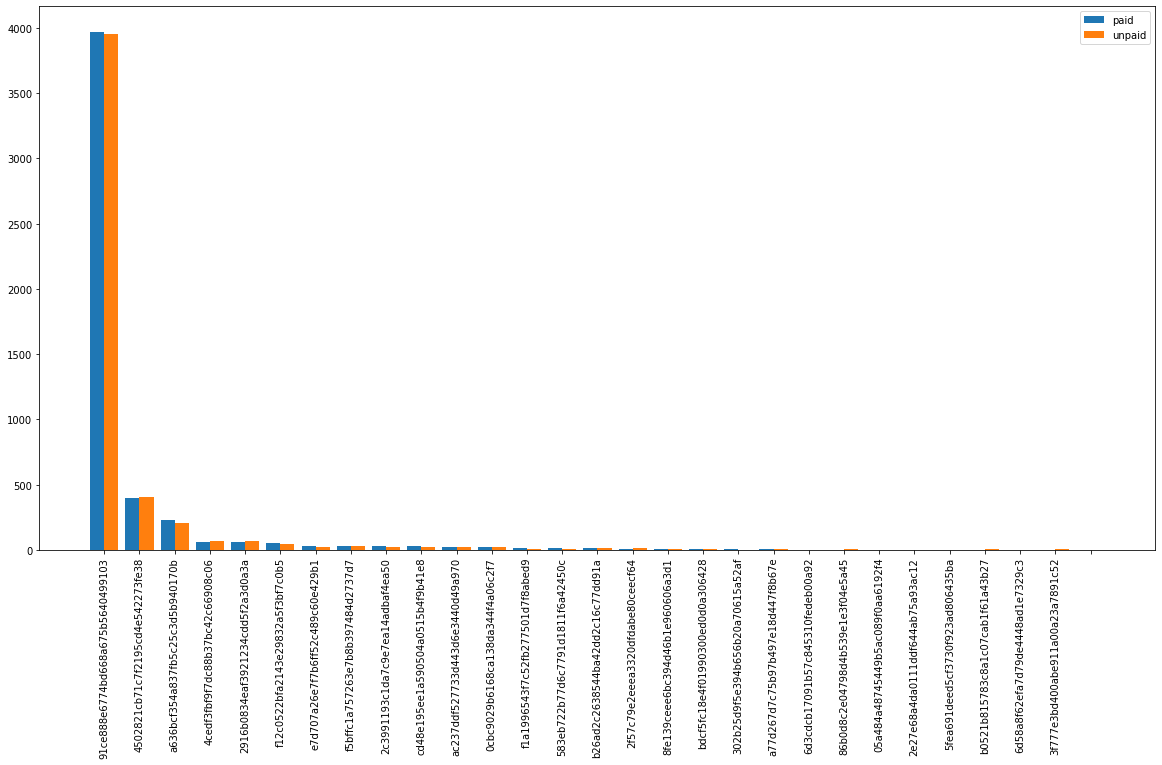

In [ ]:
fig, ax = plt.subplots()
ax.bar(paid.source.value_counts().index, paid.source.value_counts().values, width=-0.4, align='edge')
ax.bar(unpaid.source.value_counts().index, unpaid.source.value_counts().values, width=0.4, align='edge')
ax.set_xticklabels(paid.source.value_counts().index, rotation=90)
ax.legend(labels=['paid', 'unpaid'])
fig.set_size_inches([20, 10])
plt.show()

Как мы видим из графика, источники трафика не влияют на конверсию в оплату - количество звонков с одного источника для оплативших и не оплативших примерно одинаковое.

Не очень понятно, что за данные operator_group_type - тип группы оператора 1 линии и operator_group_name - название группы оператора 1 линии.
Посмотрим, влияют ли они на конверсию в оплату.



In [ ]:
paid.operator_group_type.value_counts()

a170e8b5b0085420fa52f9f9e1d546f9    3320
e908f62885515872936a2bf07e5960a0    1638
21790c97eeb6336e5f0fdb9ef4de636f      60
Name: operator_group_type, dtype: int64

In [ ]:
unpaid.operator_group_type.value_counts()

a170e8b5b0085420fa52f9f9e1d546f9    3237
e908f62885515872936a2bf07e5960a0    1692
21790c97eeb6336e5f0fdb9ef4de636f      53
Name: operator_group_type, dtype: int64

In [ ]:
paid.operator_group_name.value_counts()

d4f622b69e50e86a65cd6fae4bcf575f    3286
a0b8ef7535f9201f77c5a97d2ba4db2b    1638
41fcb0f55a2687355fff238d3bdf319e      22
3b574fbbeb9251641816c6c5e8140e62      19
d6a7e0ab0512ccc44e702ea978ebc5df      15
c2e1985524a741220fbf9448ecc94d0e      10
63af698d7d79dadbc44ac71a068acea0       7
4066be2336930bd56d04cb32065ba808       6
6d208704ad0de706bd2da353ba4e4cb8       4
7048270b6e5da5858703cd2ef2998649       3
bec94779f5f3577acf456dda29461f53       1
50b18bd0f19a885de1c8de8c46261398       1
583602883825b5ec01a226e77d08d41b       1
8fb9f6ee463b7588838293212f19a7ce       1
d6805ace660f687196d562c6dd4ecad0       1
73231aa8aa7a12c078c764b0fd686b34       1
edb56bd0223fe29944d00db73880c963       1
71f28acc49d59768329c29ca33acb36c       1
Name: operator_group_name, dtype: int64

In [ ]:
unpaid.operator_group_name.value_counts()

d4f622b69e50e86a65cd6fae4bcf575f    3209
a0b8ef7535f9201f77c5a97d2ba4db2b    1692
41fcb0f55a2687355fff238d3bdf319e      17
d6a7e0ab0512ccc44e702ea978ebc5df      15
3b574fbbeb9251641816c6c5e8140e62      12
c2e1985524a741220fbf9448ecc94d0e      10
63af698d7d79dadbc44ac71a068acea0       7
73231aa8aa7a12c078c764b0fd686b34       4
798773b75454657007fb8b39efbc312a       2
2d651a7c0cd492ac0ea68032f936f610       2
27874c9802470669925ec02eb0c2fd64       2
4066be2336930bd56d04cb32065ba808       2
01cf9adec108aa0cd5dc4e39c2af1e42       2
43c831a1511b89eeeb1c9086c4e90f35       1
71f28acc49d59768329c29ca33acb36c       1
6d208704ad0de706bd2da353ba4e4cb8       1
ff2fd2f0bf05f9ebdfbff51ccbac77c9       1
bec94779f5f3577acf456dda29461f53       1
50b18bd0f19a885de1c8de8c46261398       1
Name: operator_group_name, dtype: int64

Как мы видим, эти столбцы существенно не влияют на конверсию в оплату.

Проверим наших менеджеров. Посмотрим, у кого из них было максимальное количесвто звонков, перешедних в оплату.

In [ ]:
paid.appointment_added_by_id.value_counts().head(20)

-2          629
 6453883     63
 6956477     41
 6418973     35
 5550313     34
 5064182     34
 2795419     32
 6343172     32
 6344055     32
 3427039     32
 5047960     31
 5962762     29
 5834813     29
 5151558     29
 6620240     29
 6418417     28
 5047703     27
 3646422     26
 4870668     26
 4208888     26
Name: appointment_added_by_id, dtype: int64

У нас есть странный id -2, очевидно, это какое-то пропущенное значение, но не менеджер, возможно, это код стажеров. На всякий случай посмотрим и неуспешные звонки, проверим, есть ли такой код в них.

In [ ]:
unpaid.appointment_added_by_id.value_counts().head(20)

-2          663
 6453883     46
 5064182     43
 5550313     42
 2795419     42
 6343172     41
 3646444     34
 4800176     32
 6418417     31
 4578767     30
 4208888     29
 5835289     27
 3427039     27
 4740585     26
 5962762     26
 6620250     25
 6343199     25
 5550077     25
 3646384     24
 6956477     24
Name: appointment_added_by_id, dtype: int64

Далее проверим временные значения: влияет ли то, как быстро менеджер позвонил, как быстро клиент ответил и дошел до первого урока на конверсию в оплату.

Создам отдельную таблицу только с временными значениями и буду анализировать ее.

In [ ]:
data_time = pd.DataFrame(data, columns =['application_datetime', 'first_call', 'first_reach', 'trial_appointment_datetime', 'is_paid'])


In [ ]:
data_time.head()

,application_datetime,first_call,first_reach,trial_appointment_datetime,is_paid
0,2020-04-03 04:10:45,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,2020-04-04 15:28:14.798018,0
1,2020-07-12 03:31:39,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,2020-07-12 15:02:07.545403,0
2,2020-02-01 03:19:28,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,2020-02-02 07:07:41.388133,0
3,2020-05-19 06:18:16,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,2020-05-19 13:01:02.901309,0
4,2020-02-09 21:59:18,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,2020-02-11 05:33:59.680231,0


In [ ]:
import datetime as dt


In [ ]:
data_time['dif_1'] = data_time['first_call'] - data_time['application_datetime']
data_time['dif_2'] = data_time['first_reach'] - data_time['application_datetime']
data_time['dif_3'] = data_time['trial_appointment_datetime'] - data_time['application_datetime']
data_time.head()

,application_datetime,first_call,first_reach,trial_appointment_datetime,is_paid,dif_1,dif_2,dif_3
0,2020-04-03 04:10:45,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,2020-04-04 15:28:14.798018,0,0 days 12:33:14.508792,0 days 18:00:42.455366,1 days 11:17:29.798018
1,2020-07-12 03:31:39,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,2020-07-12 15:02:07.545403,0,0 days 01:15:33.312267,0 days 03:33:59.094529,0 days 11:30:28.545403
2,2020-02-01 03:19:28,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,2020-02-02 07:07:41.388133,0,3 days 01:25:52.910754,3 days 07:23:07.204203,1 days 03:48:13.388133
3,2020-05-19 06:18:16,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,2020-05-19 13:01:02.901309,0,0 days 01:00:29.609637,0 days 02:21:38.048419,0 days 06:42:46.901309
4,2020-02-09 21:59:18,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,2020-02-11 05:33:59.680231,0,0 days 11:15:27.941424,0 days 22:01:43.297674,1 days 07:34:41.680231


In [ ]:
print("Средняя разница между временем заявки и первым звонком менеджера для тех, кто внес первую оплатy:")
print(data_time[data_time['is_paid'] == 1]["dif_1"].mean())
print()
print("Средняя разница между временем заявки и первым звонком менеджера для тех, кто не внес первую оплатy:")
print(data_time[data_time['is_paid'] == 0]["dif_1"].mean())
print()
print("Средняя разница между временем заявки и первым дозвоном для тех, кто внес первую оплатy:")
print(data_time[data_time['is_paid'] == 1]["dif_2"].mean())
print()
print("Средняя разница между временем заявки и первым дозвоном  для тех, кто не внес первую оплатy:")
print(data_time[data_time['is_paid'] == 0]["dif_2"].mean())
print()
print("Средняя разница между временем заявки и временем проведения первого урока, кто внес первую оплатy:")
print(data_time[data_time['is_paid'] == 1]["dif_3"].mean())
print()
print("Средняя разница между временем заявки и временем проведения первого урока для тех, кто не внес первую оплатy:")
print(data_time[data_time['is_paid'] == 0]["dif_3"].mean())

Средняя разница между временем заявки и первым звонком менеджера для тех, кто внес первую оплатy:
6 days 20:23:20.802695283

Средняя разница между временем заявки и первым звонком менеджера для тех, кто не внес первую оплатy:
8 days 10:47:44.478581904

Средняя разница между временем заявки и первым дозвоном для тех, кто внес первую оплатy:
8 days 04:00:55.092501807

Средняя разница между временем заявки и первым дозвоном  для тех, кто не внес первую оплатy:
10 days 03:58:25.553559343

Средняя разница между временем заявки и временем проведения первого урока, кто внес первую оплатy:
4 days 03:23:27.779969082

Средняя разница между временем заявки и временем проведения первого урока для тех, кто не внес первую оплатy:
4 days 14:41:44.507210736


Итак, мы видим, что во-первых, флоу обработки заявки соблюдается не всегда - получается, что в среднем сначала студенты проходят вводный урок, а затем им звонит менеджер. Однако на конверсию в продажу это не влияет.

Однако среднее время дозвонов менеджера влияет на конверсию - чем раньше менеджеры дозваниваются, тем выше вероятность оплаты.

Далее посмотрим, влияет ли сезон, месяц или день месяца и время суток на конверсию в заявку.

In [ ]:
import datetime as dt


In [ ]:
paid_time = pd.DataFrame(paid, columns =['application_datetime', 'first_call', 'first_reach', 'trial_appointment_datetime'])
paid_time.head()

,application_datetime,first_call,first_reach,trial_appointment_datetime
5,2020-09-03 22:46:59,2020-09-03 23:00:16.098750,NaT,2020-09-21 01:14:13.178574
6,2020-02-14 05:03:52,2020-02-19 04:31:07.631685,2020-02-19 10:12:25.115611,2020-02-15 07:31:47.111285
8,2020-08-10 21:18:25,2020-08-10 23:33:51.699656,2020-08-10 23:49:28.894191,2020-08-10 22:33:02.044346
9,2020-04-11 17:38:04,2020-04-11 20:21:28.672311,2020-04-12 00:24:45.477519,2020-04-12 13:17:15.117247
11,2020-04-05 17:12:54,2020-04-05 19:14:50.103635,2020-04-05 23:21:57.125363,2020-04-06 12:27:57.891760


In [ ]:
unpaid_time = pd.DataFrame(unpaid, columns =['application_datetime', 'first_call', 'first_reach', 'trial_appointment_datetime'])
unpaid_time.head()

,application_datetime,first_call,first_reach,trial_appointment_datetime
0,2020-04-03 04:10:45,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,2020-04-04 15:28:14.798018
1,2020-07-12 03:31:39,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,2020-07-12 15:02:07.545403
2,2020-02-01 03:19:28,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,2020-02-02 07:07:41.388133
3,2020-05-19 06:18:16,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,2020-05-19 13:01:02.901309
4,2020-02-09 21:59:18,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,2020-02-11 05:33:59.680231


In [ ]:
paid_time["month"] = paid_time['application_datetime'].dt.month
paid_time["day"] = paid_time['application_datetime'].dt.day
paid_time["weekday"] = paid_time['application_datetime'].dt.weekday

In [ ]:
unpaid_time["month"] = unpaid_time['application_datetime'].dt.month
unpaid_time["day"] = unpaid_time['application_datetime'].dt.day
unpaid_time["weekday"] = unpaid_time['application_datetime'].dt.weekday

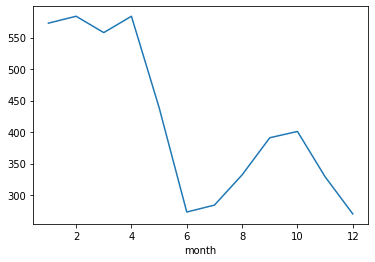

In [ ]:
paid_time.groupby('month').month.count().plot()

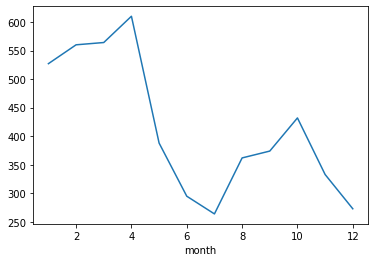

In [ ]:
unpaid_time.groupby('month').month.count().plot()

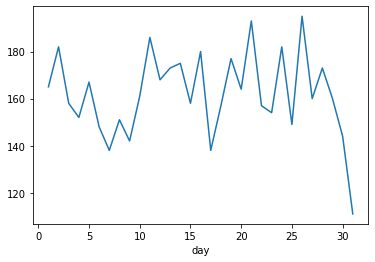

In [ ]:
paid_time.groupby('day').day.count().plot()

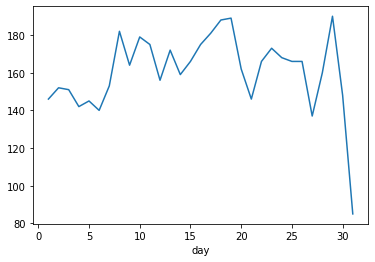

In [ ]:
unpaid_time.groupby('day').day.count().plot()

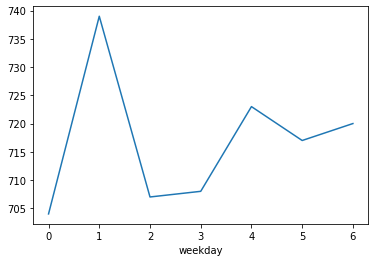

In [ ]:
paid_time.groupby('weekday').weekday.count().plot()

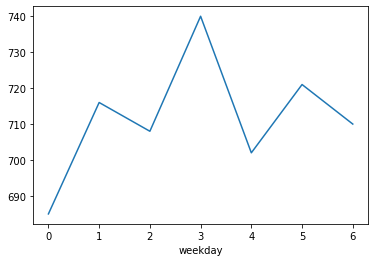

In [ ]:
unpaid_time.groupby('weekday').weekday.count().plot()

Среди тех, кто оставил заявку, зависимость успеха и неуспеха от месяца не отличаются - и успешных, и неуспешных больше в начале и ближе у концу года и меньше в летние месяцы, это может означать, что летом просто падает спрос, и количество заявок вообще.

Зависимость конверсии от чисел месяца тоже особо не прослеживается.

Зато прослеживается зависимость успешных заявок от дня недели - оплату в большей степени вносили ребята, зарегистрировшиеся во вторник и пятницу. Среди тех, кто оставлял заявки в среду, больше всего отказов.

In [ ]:
Теперь посмотрим на время, в которое менеджеры дозванивались до клиентов.

In [ ]:
paid_time["hour"] = paid_time['first_reach'].dt.hour
unpaid_time["hour"] = unpaid_time['first_reach'].dt.hour

In [ ]:
paid_time.head()

,application_datetime,first_call,first_reach,trial_appointment_datetime,month,day,weekday,hour
5,2020-09-03 22:46:59,2020-09-03 23:00:16.098750,NaT,2020-09-21 01:14:13.178574,9,3,22,NaN
6,2020-02-14 05:03:52,2020-02-19 04:31:07.631685,2020-02-19 10:12:25.115611,2020-02-15 07:31:47.111285,2,14,5,10.0
8,2020-08-10 21:18:25,2020-08-10 23:33:51.699656,2020-08-10 23:49:28.894191,2020-08-10 22:33:02.044346,8,10,21,23.0
9,2020-04-11 17:38:04,2020-04-11 20:21:28.672311,2020-04-12 00:24:45.477519,2020-04-12 13:17:15.117247,4,11,17,0.0
11,2020-04-05 17:12:54,2020-04-05 19:14:50.103635,2020-04-05 23:21:57.125363,2020-04-06 12:27:57.891760,4,5,17,23.0


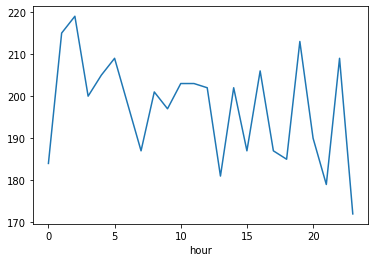

In [ ]:
paid_time.groupby('hour').hour.count().plot()

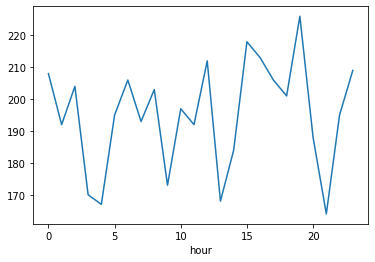

In [ ]:
unpaid_time.groupby('hour').hour.count().plot()

In [ ]:
paid_time.groupby('hour').hour.count()

hour
0.0     184
1.0     215
2.0     219
3.0     200
4.0     205
5.0     209
6.0     198
7.0     187
8.0     201
9.0     197
10.0    203
11.0    203
12.0    202
13.0    181
14.0    202
15.0    187
16.0    206
17.0    187
18.0    185
19.0    213
20.0    190
21.0    179
22.0    209
23.0    172
Name: hour, dtype: int64

In [ ]:
unpaid_time.groupby('hour').hour.count()

hour
0.0     208
1.0     192
2.0     204
3.0     170
4.0     167
5.0     195
6.0     206
7.0     193
8.0     203
9.0     173
10.0    197
11.0    192
12.0    212
13.0    168
14.0    184
15.0    218
16.0    213
17.0    206
18.0    201
19.0    226
20.0    188
21.0    164
22.0    195
23.0    209
Name: hour, dtype: int64

Из графиков и количества дозвонов/недозвонов по часам видим, что время суток не влияет на оплату.

# **Итог**

Мы видим, что из всех данных на результат влияет только скорость с которой менеджер дозвонился до клиента и день, в который клиент оставил заявку.

Задача была в том, чтобы составить менеджерам инструкции для улучшения конверсии:

###Инструкции для менеджеров:
1. Обрабатываейте заявки как можно быстрее. Чем быстрее вы дозвонитесь до клиента, тем выше вероятность того, что он сделает оплату.
2. В первую очередь звоните клиентам, которые оставили заявки во вторник и пятницу, они больше всего конвертируются в оплаты. Те, что оставили заявку в среду покупают реже всего.
3. Узнайте, как работают с клиентами менеджеры с id 6453883, 6956477, 6418973, 5550313, 5064182 - у них больше всего оплат за текущий период.